# **The Sparks Foundation- GRIP- Data Science and Business Analytics Intern- October-2021 Batch**

Author: Raj Kirti Shah

Task-1:- Prediction Using Supervised Machine Learning Model

Level :- Beginner

Language :- Python

Software :- Google Colab

Dataset :- http://bit.ly/w-data

In [41]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
df= pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


**Exploratory Data Analysis**

In [43]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [44]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [46]:
df.shape

(25, 2)

In [47]:
# Checking if there are any null values or not
df.isna().sum()

Hours     0
Scores    0
dtype: int64

In [48]:
#correlation between hours and scores
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


**Visualization**

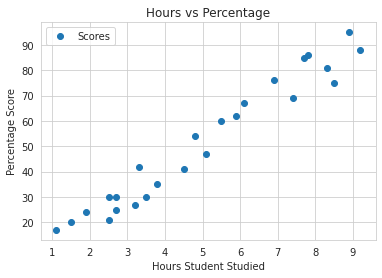

In [49]:
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Student Studied')  
plt.ylabel('Percentage Score')  
plt.show()

hours of students and percentage scores are directly proportional.
And we can say from the graph that there is a strong positive corelation between the hours of student studied and the percentage scores.

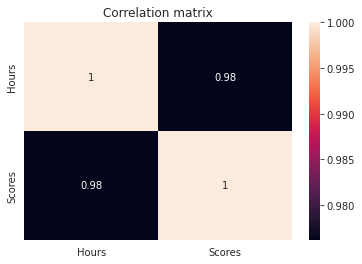

In [50]:
sns.set_style('whitegrid')
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation matrix');

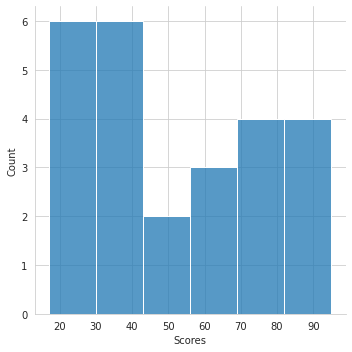

In [51]:
sns.displot(df.Scores)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


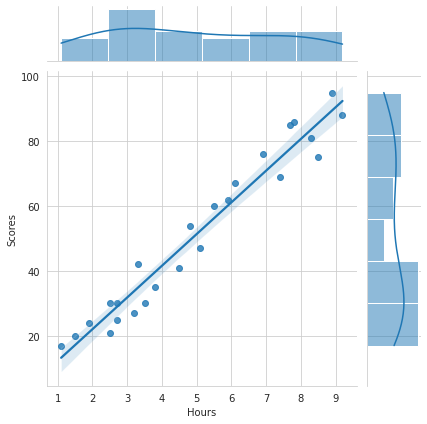

In [52]:
sns.jointplot('Hours','Scores',data=df,kind='reg');

as we have seen that hours of studies and percentage scores are directly proportional and shows positive correlation so as the number of hours increases the chances of higher percentage score is also increases.


Train test split - 

In [53]:
#separating x and y
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

In [54]:
from sklearn.model_selection import train_test_split
train_X,test_x,train_Y,test_y = train_test_split(X, y, random_state=0)

In [55]:
train_X.shape

(18, 1)

In [56]:
test_x.shape

(7, 1)

In [57]:
train_Y.shape

(18,)

In [58]:
test_y.shape

(7,)

Preparing Model


In [59]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(train_X, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [60]:
pred_y = reg.predict(test_x)
pred = pd.DataFrame({'Hours':[i[0] for i in test_x], 'Predicted Scores':[k for k in pred_y]})
pred

,Hours,Predicted Scores
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


In [62]:
compare_scores = pd.DataFrame({'Actual Marks': val_y, 'Predicted Marks':pred_y})
compare_scores

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


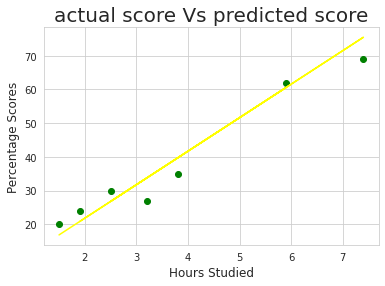

In [65]:
plt.scatter(x=test_x,y=test_y,color='green')
plt.plot(test_x,pred_y,color='yellow')
plt.title('actual score Vs predicted score',size=20)
plt.ylabel('Percentage Scores',size=12)
plt.xlabel('Hours Studied',size=12)
plt.show()

Model Evaluation

In [67]:
from sklearn.metrics import mean_absolute_error,r2_score

In [68]:
print('R2 Score - ',r2_score(test_y,pred_y))

R2 Score -  0.9367661043365056


In [69]:
print('Mean Absolute Error: ',mean_absolute_error(test_y,pred_y))

Mean Absolute Error:  4.130879918502482


Prediciton - 

In [72]:
hours = [9.35]
result = reg.predict([hours])
print("Score = {}".format(round(result[0],3)))

Score = 94.887


In [73]:
hours = [5]
res = reg.predict([hours])
print("Score = {}".format(round(res[0],3)))

Score = 51.641


In [74]:
hours = [1]
res = reg.predict([hours])
print("Score = {}".format(round(res[0],3)))

Score = 11.874


In [78]:
hours = [9]
res = reg.predict([hours])
print("Score = {}".format(round(res[0],3)))

Score = 91.407


In [77]:
hours = [8.5]
res = reg.predict([hours])
print("Score = {}".format(round(res[0],3)))

Score = 86.436


So from above calcuation we can conclude that - 
* If student studies for 9.35 hours  then that student may score 94.887% 
* If student studies for 5 hours  then that student may score 51.641% 
* If student studies for 1 hours  then that student may score 11.874% 
* If student studies for 9 hours  then that student may score 91.407% 
* If student studies for 8.5 hours  then that student may score 86.436% 
